# radial basis function neural networks(RBFNNs)

In [1]:
%matplotlib inline 
from IPython.core.display import display

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from sympy import *
init_printing()
#from math import *
from interval import interval
from interval import imath as im
import sys
from pprint import pprint

In [2]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import numpy as np
import pandas as pd

## $NN(x_1, x_2) = exp(-4(x_1 - 1)^2  -  6(x_2 - 0.5)^2) + exp(-7(x_1+1.5)^2 - 9(x_2+1)^2)$
where $x_1 \in [-2,2], x_2 \in [-2,2]$

### グラフの可視化

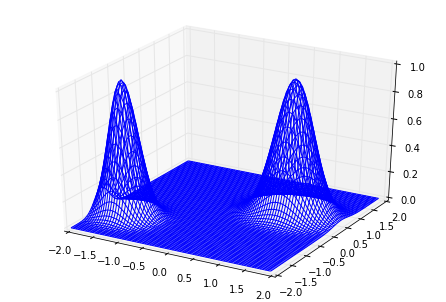

In [3]:
def activate_func(x):
    """
    params:
        x = np.array([x_1, x_2])
    """
    return np.exp(-4*((x[0]-1)**2) - 6*((x[1]-0.5)**2)) + \
        np.exp(-7*((x[0]+1.5)**2) - 9*((x[1]+1)**2))
    
# x = np.arange(-1.6, -1.35, 0.004) 
# y = np.arange(-1.16, -0.9, 0.004) 

x = np.arange(-2, 2, 0.05) 
y = np.arange(-2, 2, 0.05) 

X, Y = np.meshgrid(x, y)
Z = np.apply_along_axis(activate_func, 0, np.array([X.flatten(), Y.flatten()])).reshape(X.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z) 
plt.show()

### Krawczyk method

In [4]:
from ivmat import (
    ivmat, 
    fmat, 
    Krawczyk
)

In [5]:
x_1, x_2, x_3 = var("x_1 x_2 x_3")
f_x_1 = symbols("f_x_1", cls=Function)
f_x_2 = symbols("f_x_2", cls=Function)
nn = exp(-4*(x_1-1)**2 - 6*(x_2-0.5)**2) + exp(-7*(x_1+1.5)**2 - 9*(x_2+1)**2)
func_eval = lambda func: (lambda x_1, x_2, exp=im.exp: eval(str(func)))
f = fmat([[func_eval(nn)]])
f_grad_symbol = [[nn.diff(x_1)],[nn.diff(x_2)]]
f_grad = fmat([[func_eval(nn.diff(x_1))], [func_eval(nn.diff(x_2))]])
hes = hessian(nn, (x_1,x_2))
f_grad_grad = fmat([[None for i in range(hes.shape[1])] for j in range(hes.shape[0])])
for i in range(2):
    for j in range(2):
        f_grad_grad[i][j] = func_eval(hes[i,j])

# x_1= interval[-1.6, -1.45]
# x_2 = interval[-0.9,-1.2]
# X = ivmat([[x_1],[x_2]])
# kra = Krawczyk(f_grad,f_grad_grad,X)

#### 自動微分 

----nn-----



----nn_grad----


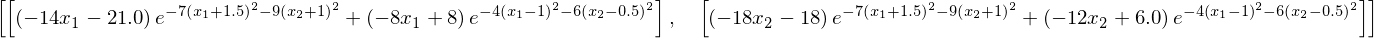


-----nn_hessian-----


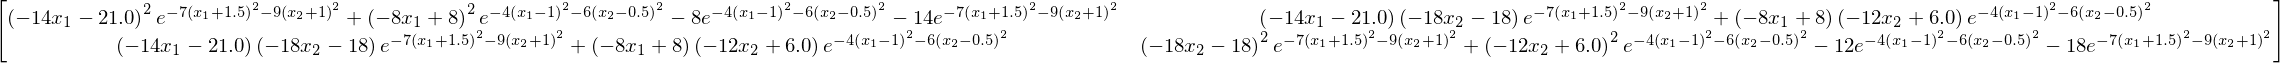

In [6]:
print '----' + 'nn' + '-----'
display(nn)
print
print '----' + 'nn_grad' + '----'
display(f_grad_symbol)
print
print '-----' + 'nn_hessian' + '-----'
display(hes)
print
# print '-----' + 'X' + '-------'
# pprint(X)
# print

#### 全解探索

In [7]:
x_1 = interval[11.239995, 11.239999]
x_2 = interval[7.8599, 7.86]
# x_1 = interval[-2, 2]
# x_2 = interval[-2, 2]
#x_2 = interval[7.82, 7.84]
X = ivmat([[x_1],[x_2]])

#X = ivmat([[interval([11.239998937499998, 11.239998968749997])], [interval([7.8599193603515625, 7.859919384765625])]])
kra = Krawczyk(f_grad,f_grad_grad,X)
#res = kra.refine(10, True)
print '----'
boxes, task_nums = kra.find_all_solution(trace=False, cnt_max=101)
print '#####'*10
pprint(boxes)


----
---- 100 -----------------------------------------
len(S) == 94
T
len(T) == 0
[]
--------------------------------------------------------------------------------
break becase cnt > 101

102
---------- 最終的なS -----------
[[[interval([11.239995, 11.239996999999999])],
  [interval([7.859971875, 7.859975])]],
 [[interval([11.239996999999999, 11.239999])],
  [interval([7.859971875, 7.859975])]],
 [[interval([11.239995, 11.239996999999999])],
  [interval([7.859975, 7.8599781250000005])]],
 [[interval([11.239996999999999, 11.239999])],
  [interval([7.859975, 7.8599781250000005])]],
 [[interval([11.239995, 11.239996999999999])],
  [interval([7.8599781250000005, 7.859981250000001])]],
 [[interval([11.239996999999999, 11.239999])],
  [interval([7.8599781250000005, 7.859981250000001])]],
 [[interval([11.239995, 11.239996999999999])],
  [interval([7.859981250000001, 7.859984375000001])]],
 [[interval([11.239996999999999, 11.239999])],
  [interval([7.859981250000001, 7.859984375000001])]],
 [[i

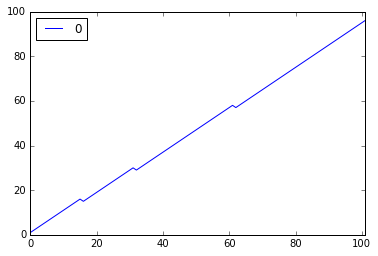

In [8]:
pd.DataFrame(task_nums).plot()

In [9]:
X = ivmat([[interval([11.239998499999999, 11.239999])], [interval([7.85991875, 7.85991953125])]])

In [10]:
# x_1 = interval[-1.6, 1.301]
# x_2 = interval[-1.7, 2.003]
# X = ivmat([[x_1],[x_2]])
# kra = Krawczyk(f_grad,f_grad_grad,X)

# iter_X = ivmat([[interval[0.3,0.4999]], [interval[0.96, 1.002]]])
# print 'hausdorff ', ivmat.hausdorff_distance(X, iter_X)
# print 'iter_X'
# print iter_X
# print 'iter_Xに1回K法適用した結果'
# print kra.refine(iter_X)
# print iter_X.extend_width()
# print '-----'*10
# kra.prove_algorithm(iter_X, X, 10)

# (1, 0.5), (-1.5, -1)

In [11]:
x_1= interval[-1.6, -1.35]
x_2 = interval[-0.9,-1.16]

# x_1= interval[-1.6, -1.33]
# x_2 = interval[-0.96,-1.12]

[[interval([-1.6, -1.35])], [interval([-1.16, -0.9])]]
------ start ------
[[interval([-1.6, -1.35])], [interval([-1.16, -0.9])]]


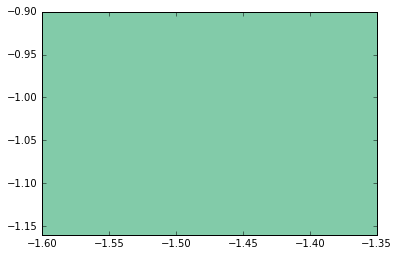

[[interval([-1.6, -1.3644230657185032])], [interval([-1.1334248626883618, -0.9])]]


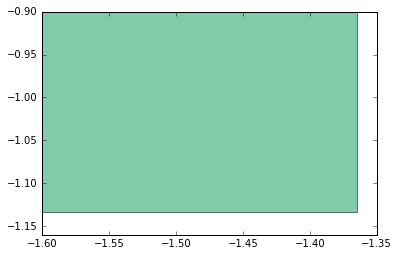

[[interval([-1.6, -1.4066790103977702])], [interval([-1.0870687455858021, -0.9])]]


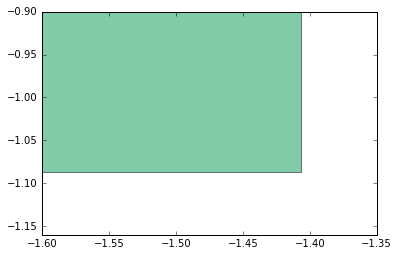

[[interval([-1.5380214710267248, -1.4611804453790649])], [interval([-1.0430472110407085, -0.9603075146225658])]]


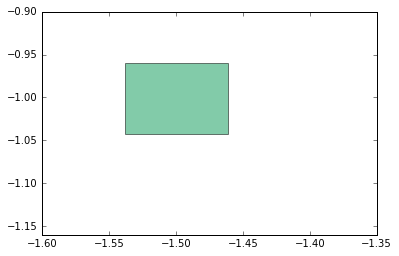

[[interval([-1.5037855672172575, -1.496198450434522])], [interval([-1.0041462036884117, -0.9955855140396416])]]


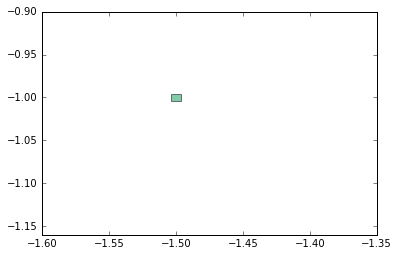

[[interval([-1.5000787586352429, -1.499920921715249])], [interval([-1.0003541214389056, -0.9996673410957982])]]


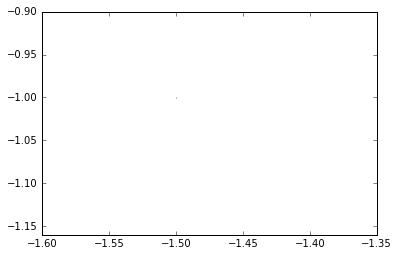

In [12]:
X = ivmat([[x_1],[x_2]])
kra = Krawczyk(f_grad,f_grad_grad,X)
print X
print '------ start ------'


for i in range(0,5+1):
    res = kra.refine(kra.X, i)
    print res
    fig = plt.figure()
    plt.xlim(*X[0][0][0])
    plt.ylim(*X[1][0][0])
    ax = fig.add_subplot(111)
    left,right,below,above = res[0][0][0][0],res[0][0][0][1],res[1][0][0][0],res[1][0][0][1]
#    print left,right,below,above
    rect = Rectangle((left, below),
                    right - left,
                    above - below,
                    facecolor="#079955",
                    alpha = 0.5
                    )
    ax.add_patch(rect)
    plt.show()
    

[[interval([-1.6, -1.35])], [interval([-1.16, -0.9])]]


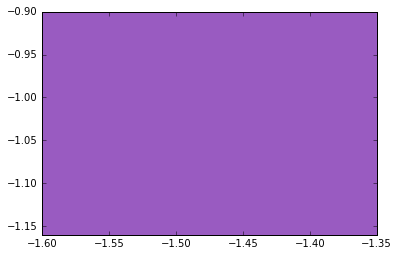

[[interval([-1.6, -1.3644230657185032])], [interval([-1.1334248626883618, -0.9])]]


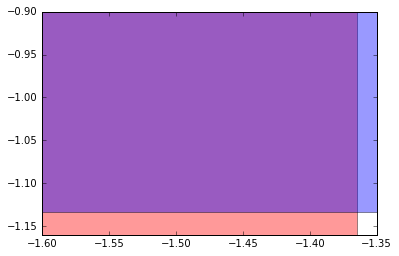

[[interval([-1.6, -1.4066790103977702])], [interval([-1.0870687455858021, -0.9])]]


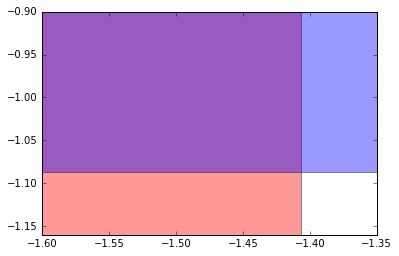

[[interval([-1.5380214710267248, -1.4611804453790649])], [interval([-1.0430472110407085, -0.9603075146225658])]]


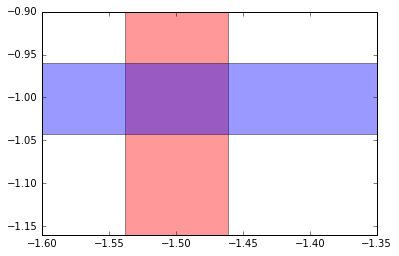

[[interval([-1.5037855672172575, -1.496198450434522])], [interval([-1.0041462036884117, -0.9955855140396416])]]


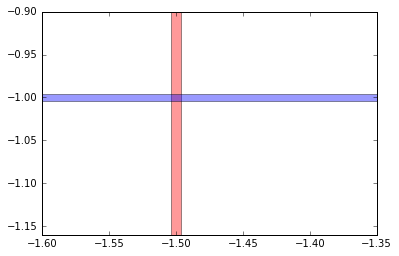

[[interval([-1.5000787586352429, -1.499920921715249])], [interval([-1.0003541214389056, -0.9996673410957982])]]


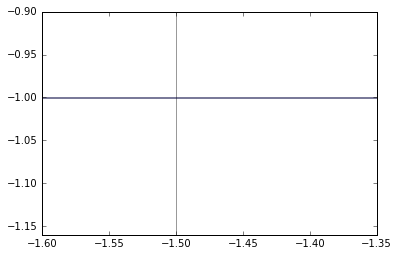

In [13]:
for i in range(0,5+1):
    res = kra.refine(kra.X, i)
    print res
    plt.figure()
    plt.xlim(*X[0][0][0])
    plt.ylim(*X[1][0][0])
    below,above,left,right = res[0][0][0][0],res[0][0][0][1],res[1][0][0][0],res[1][0][0][1]

    plt.axvspan(below, above, facecolor='r', alpha=0.4)
    plt.axhspan(left, right, facecolor='b', alpha=0.4)
    plt.show()

In [14]:
a = ivmat([[interval[1,3]], [interval[2,7]]])
b = ivmat([[interval[-2,0.2]], [interval[1,4]]])

$ K(X) = m(X) - Y f(m(X)) + \{I - Y F^{'}(X)\}(X - m(X))$

where

$m(X) $is midpoint of $X$,

$Y$ is approximation of $m(F^{'}(X))^{-1}$
